# ▶ Part3. 연관분석 실전

- 데이터설명: 베이커리에서 판매된 상품의 트랜잭션 기록 데이터
- 변수: Date(판매일자) / Time(판매시간) / Transaction(고객번호) / Item(판매상품)
- 판매일자: 2016.10.30 - 2017.04.09 

- https://programmer-ririhan.tistory.com/190

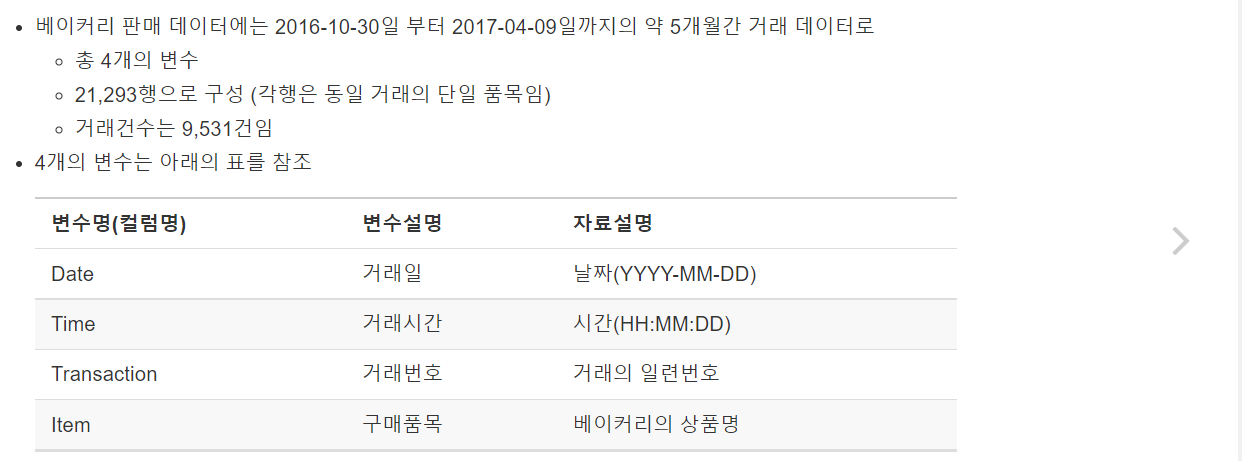

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

### [3-1] 트랜잭션 상품데이터셋 살펴보기

In [7]:
df=pd.read_csv('./BreadBasket_DMS.csv')
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,9:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [9]:
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [15]:
#판매 빈도수 사위 15개
df['Item'].value_counts()[:15]

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Name: Item, dtype: int64

<AxesSubplot:>

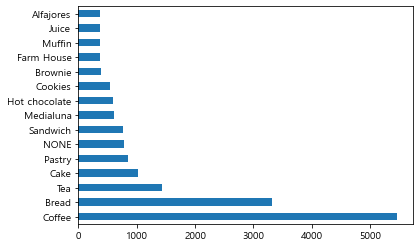

In [16]:
#판매 빈도수 사위 15개 차트
df['Item'].value_counts()[:15].plot(kind='barh')

Coffee           0.256939
Bread            0.156155
Tea              0.067393
Cake             0.048138
Pastry           0.040201
NONE             0.036914
Sandwich         0.036209
Medialuna        0.028930
Hot chocolate    0.027709
Cookies          0.025360
Brownie          0.017799
Farm House       0.017564
Muffin           0.017377
Juice            0.017330
Alfajores        0.017330
Name: Item, dtype: float64


<AxesSubplot:>

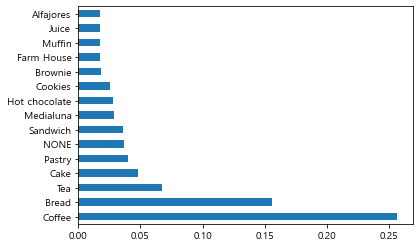

In [19]:
# 판매빈도수 상위15개 % 계산 및 차트
tmp=df['Item'].value_counts()[:15]
tmp_r=tmp/len(df)
print(tmp_r)
tmp_r.plot(kind='barh')

### [3-2] 요일 및 시간별 트랜잭션 분포확인

In [25]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,9:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [24]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 665.5+ KB


In [26]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day_name']=df['Date'].dt.day_name()
df['hour']=df['Time'].str.split(':').str[0].astype(int)
df.head()

,Date,Time,Transaction,Item,year,month,day_name,hour
0,2016-10-30,9:58:11,1,Bread,2016,10,Sunday,9
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,Sunday,10
4,2016-10-30,10:07:57,3,Jam,2016,10,Sunday,10


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   year         21293 non-null  int64         
 5   month        21293 non-null  int64         
 6   day_name     21293 non-null  object        
 7   hour         21293 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(3)
memory usage: 1.2+ MB


<AxesSubplot:xlabel='hour', ylabel='count'>

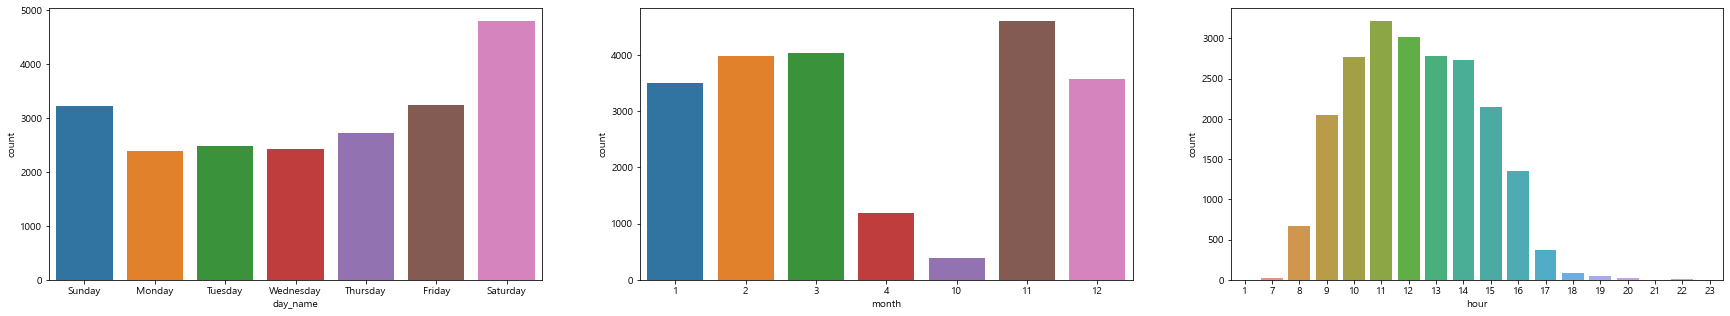

In [28]:
#########################################################
## 베이커리의 손님 대부분이 토요일에 손님 많음
##  데이터가 2016.10.30 - 2017.04.09 사이의 데이터이기 때문에 4월과 10월의 데이터가 적을 수 밖에 없음
## 오전 8시에서 오후 5시 사이에 분포함을 볼 수 있으며, 특히 오전 11시 경에 손님이 가장 분빔
########################################################
plt.figure(figsize=(30,5))
import seaborn as sns

plt.subplot(1,3,1)
sns.countplot(x='day_name',data=df)


plt.subplot(1,3,2)
sns.countplot(x='month',data=df)


plt.subplot(1,3,3)
sns.countplot(x='hour',data=df)

### [3-3] 연관분석 데이터셋으로 변환
- TransactionEncoder 에 사용될수 있는 list구조로 변환

In [41]:
#########################################################
###  고객번호 최대값 확인
#########################################################
cnt=df['Transaction'].max()
print(cnt)
df.describe()
df.info()

9684
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   year         21293 non-null  int64         
 5   month        21293 non-null  int64         
 6   day_name     21293 non-null  object        
 7   hour         21293 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(3)
memory usage: 1.2+ MB


In [33]:
df.head()

,Date,Time,Transaction,Item,year,month,day_name,hour
0,2016-10-30,9:58:11,1,Bread,2016,10,Sunday,9
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,Sunday,10
4,2016-10-30,10:07:57,3,Jam,2016,10,Sunday,10


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   year         21293 non-null  int64         
 5   month        21293 non-null  int64         
 6   day_name     21293 non-null  object        
 7   hour         21293 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(3)
memory usage: 1.2+ MB


In [43]:
#########################################################
###  데이터프레임 list로 변경
#########################################################

df_tmp=df[['Transaction','Item']]
df_tmp_arr=[[]for i in range(cnt+1)]


for idx,i in enumerate(df_tmp['Item']) :
    df_tmp_arr[df_tmp['Transaction'][idx]].append(i)

df_tmp_arr[:5]

[[],
 ['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin']]

In [44]:
df.head(10)

,Date,Time,Transaction,Item,year,month,day_name,hour
0,2016-10-30,9:58:11,1,Bread,2016,10,Sunday,9
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,Sunday,10
4,2016-10-30,10:07:57,3,Jam,2016,10,Sunday,10
5,2016-10-30,10:07:57,3,Cookies,2016,10,Sunday,10
6,2016-10-30,10:08:41,4,Muffin,2016,10,Sunday,10
7,2016-10-30,10:13:03,5,Coffee,2016,10,Sunday,10
8,2016-10-30,10:13:03,5,Pastry,2016,10,Sunday,10
9,2016-10-30,10:13:03,5,Bread,2016,10,Sunday,10


In [45]:
df_tmp_arr[:10]

[[],
 ['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin']]

In [46]:
df[df['Transaction']==5]

,Date,Time,Transaction,Item,year,month,day_name,hour
7,2016-10-30,10:13:03,5,Coffee,2016,10,Sunday,10
8,2016-10-30,10:13:03,5,Pastry,2016,10,Sunday,10
9,2016-10-30,10:13:03,5,Bread,2016,10,Sunday,10


In [47]:
df[df['Transaction']==6]

,Date,Time,Transaction,Item,year,month,day_name,hour
10,2016-10-30,10:16:55,6,Medialuna,2016,10,Sunday,10
11,2016-10-30,10:16:55,6,Pastry,2016,10,Sunday,10
12,2016-10-30,10:16:55,6,Muffin,2016,10,Sunday,10


In [49]:
#df_tmp_arr.pop(0)
df_tmp_arr.pop(0)

[]

In [51]:
df_tmp_arr[:5]

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread']]

In [61]:
#각 Transaction별 중복 값 제거
df_tmp_arr=[list(set(i)) for i in df_tmp_arr]
df_tmp_arr

[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Cookies', 'Jam'],
 ['Muffin'],
 ['Coffee', 'Bread', 'Pastry'],
 ['Medialuna', 'Muffin', 'Pastry'],
 ['Medialuna', 'Coffee', 'Tea', 'Pastry'],
 ['Bread', 'Pastry'],
 ['Muffin', 'Bread'],
 ['Medialuna', 'Scandinavian'],
 ['Medialuna', 'NONE', 'Bread'],
 ['Tartine', 'Tea', 'Coffee', 'Pastry', 'Jam'],
 ['Coffee', 'Bread', 'Basket'],
 ['Medialuna', 'Bread', 'Pastry'],
 ['Scandinavian', 'NONE', 'Mineral water'],
 ['Medialuna', 'Bread', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Bread', 'Farm House'],
 ['Medialuna', 'Bread'],
 ['Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['NONE', 'Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Bread', 'Tea'],
 ['Coffee', 'NONE', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Tartine', 'NONE', 'Cof

### [3-4] 연관규칙 생성

In [62]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(df_tmp_arr).transform(df_tmp_arr)
df = pd.DataFrame(te_ary, columns=te.columns_)
len(df.columns)

95

In [74]:
df

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
#지지도가 0.001 이상인 itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.035523,(Alfajores)
1,0.015696,(Baguette)
2,0.319806,(Bread)
3,0.039137,(Brownie)
4,0.101508,(Cake)
...,...,...
58,0.048740,"(Coffee, Tea)"
59,0.023131,"(Coffee, Toast)"
60,0.017968,"(NONE, Tea)"
61,0.014044,"(Sandwich, Tea)"


In [99]:
#지지도가 0.05이상인 itemsets중 신뢰과 0.1이상인 itemsets
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
1,(Brownie),(Coffee),0.039137,0.467575,0.019207,0.490765,1.049596,0.000908,1.045538
2,(Cake),(Coffee),0.101508,0.467575,0.053490,0.526958,1.127002,0.006028,1.125534
3,(Cookies),(Coffee),0.053181,0.467575,0.027571,0.518447,1.108798,0.002705,1.105640
4,(Hot chocolate),(Coffee),0.057001,0.467575,0.028914,0.507246,1.084844,0.002261,1.080509
5,(Juice),(Coffee),0.037691,0.467575,0.020136,0.534247,1.142589,0.002513,1.143147
6,(Medialuna),(Coffee),0.060409,0.467575,0.034387,0.569231,1.217410,0.006141,1.235986
7,(Muffin),(Coffee),0.037588,0.467575,0.018381,0.489011,1.045844,0.000806,1.041949
8,(NONE),(Coffee),0.077757,0.467575,0.041409,0.532537,1.138932,0.005051,1.138965
9,(Pastry),(Coffee),0.084159,0.467575,0.046468,0.552147,1.180873,0.007118,1.188839


In [65]:
# 지지도(support) : 전체 항목 중(행들 중) x와 y를 모두 포함하는 경우의 비율
# 신뢰도(confidence): : x가 있을 때 y도 있는 비율(조건부 확률)
support_list=[0.005, 0.01, 0.05, 0.1]
con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


total=[]
for i in support_list:
  frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
  row=[]
  for j in con_list:
    tmp= association_rules(frequent_itemsets, metric="confidence", min_threshold=j)
    row.append(len(tmp))
  total.append(row)
total

[[118, 61, 38, 28, 19, 4, 2, 1, 0],
 [42, 30, 18, 15, 12, 1, 1, 0, 0],
 [4, 2, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

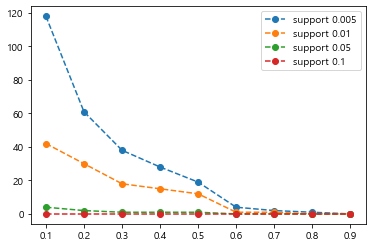

In [85]:
###################################################
## 지지도 10%, 5%의 경우 생성되는 규칙이 매우 적음 
##  지지도 0.5%의 경우 생성되는 규칙이 너무 많음
##  적정선인 지지도 1%를 선택하고자함.  
## 최소 50%의 신뢰도에서 15개 정도의 규칙이 생성되므로 
## 그 이상으로 신뢰도를 선택하고자함.
####################################################

con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
support_list=[0.005, 0.01, 0.05, 0.1]

for y,name in zip(total,support_list):

    plt.plot(con_list,y,'o',linestyle='dashed', label='support ' + str(name))
    plt.legend()

In [106]:
################################################################################
### 최소 지지도 1%(0.01), 최소 신뢰도 50%(0.05) 이상인 연관 규칙들을 생성
################################################################################

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules= association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.035523,0.319806,0.010120,0.284884,0.890802,-0.001241,0.951166
1,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
2,(Brownie),(Bread),0.039137,0.319806,0.010533,0.269129,0.841540,-0.001983,0.930663
3,(Cake),(Bread),0.101508,0.319806,0.022821,0.224822,0.702995,-0.009642,0.877468
4,(Bread),(Cake),0.319806,0.101508,0.022821,0.071359,0.702995,-0.009642,0.967535
5,(Coffee),(Bread),0.467575,0.319806,0.087980,0.188163,0.588365,-0.061553,0.837845
6,(Bread),(Coffee),0.319806,0.467575,0.087980,0.275105,0.588365,-0.061553,0.734485
7,(Cookies),(Bread),0.053181,0.319806,0.014147,0.266019,0.831815,-0.002860,0.926720
8,(Hot chocolate),(Bread),0.057001,0.319806,0.013114,0.230072,0.719413,-0.005115,0.883452
9,(Medialuna),(Bread),0.060409,0.319806,0.016522,0.273504,0.855220,-0.002797,0.936267


### [3-5] 연관규칙 해석 및 차트작성

In [107]:
# 신뢰도값으로 확인
rules.sort_values(by='confidence', ascending=False)[:10]

# 해석
# Toast를 산 손님의 70%가(confidence)가 coffe를 구매하였음
# spanish Brunch 산 손님의 60%가 coffee를 구매하였음.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(Toast),(Coffee),0.032838,0.467575,0.023131,0.704403,1.506500,0.007777,1.801181
42,(Spanish Brunch),(Coffee),0.017761,0.467575,0.010636,0.598837,1.280729,0.002331,1.327203
31,(Medialuna),(Coffee),0.060409,0.467575,0.034387,0.569231,1.217410,0.006141,1.235986
37,(Pastry),(Coffee),0.084159,0.467575,0.046468,0.552147,1.180873,0.007118,1.188839
1,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
30,(Juice),(Coffee),0.037691,0.467575,0.020136,0.534247,1.142589,0.002513,1.143147
35,(NONE),(Coffee),0.077757,0.467575,0.041409,0.532537,1.138932,0.005051,1.138965
39,(Sandwich),(Coffee),0.070219,0.467575,0.037381,0.532353,1.138539,0.004549,1.138518
21,(Cake),(Coffee),0.101508,0.467575,0.053490,0.526958,1.127002,0.006028,1.125534
40,(Scone),(Coffee),0.033767,0.467575,0.017658,0.522936,1.118399,0.001869,1.116044


In [108]:
# 향상도값으로 확인
rules.sort_values(by='lift', ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23,(Hot chocolate),(Cake),0.057001,0.101508,0.011152,0.195652,1.927463,0.005366,1.117045
22,(Cake),(Hot chocolate),0.101508,0.057001,0.011152,0.109868,1.927463,0.005366,1.059392
47,(Tea),(NONE),0.139405,0.077757,0.017968,0.128889,1.657583,0.007128,1.058697
46,(NONE),(Tea),0.077757,0.139405,0.017968,0.231076,1.657583,0.007128,1.119219
25,(Tea),(Cake),0.139405,0.101508,0.023234,0.166667,1.641913,0.009084,1.078191
24,(Cake),(Tea),0.101508,0.139405,0.023234,0.228891,1.641913,0.009084,1.116048
45,(Toast),(Coffee),0.032838,0.467575,0.023131,0.704403,1.506500,0.007777,1.801181
53,(Pastry),"(Coffee, Bread)",0.084159,0.087980,0.010946,0.130061,1.478303,0.003542,1.048373
50,"(Coffee, Bread)",(Pastry),0.087980,0.084159,0.010946,0.124413,1.478303,0.003542,1.045973
49,(Tea),(Sandwich),0.139405,0.070219,0.014044,0.100741,1.434667,0.004255,1.033941


In [109]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) 
tmp=frequent_itemsets[frequent_itemsets['length'] ==2] 
tmp

,support,itemsets,length
31,0.010120,"(Bread, Alfajores)",2
32,0.019207,"(Coffee, Alfajores)",2
33,0.010533,"(Brownie, Bread)",2
34,0.022821,"(Cake, Bread)",2
35,0.087980,"(Coffee, Bread)",2
36,0.014147,"(Bread, Cookies)",2
37,0.013114,"(Bread, Hot chocolate)",2
38,0.016522,"(Medialuna, Bread)",2
39,0.020240,"(NONE, Bread)",2
40,0.028501,"(Bread, Pastry)",2


In [110]:
ar=tmp['itemsets']

import networkx as nx
G=nx.Graph()
G.add_edges_from(ar)


import numpy as  np
pr=nx.pagerank(G)
pr

C:\Users\hmh\miniconda3\envs\hmh\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


{'Bread': 0.15867559974217835,
 'Alfajores': 0.03401795402080666,
 'Coffee': 0.2684748359987527,
 'Brownie': 0.03401795402080666,
 'Cake': 0.05965950792278901,
 'Cookies': 0.03401795402080666,
 'Hot chocolate': 0.04669568599129706,
 'Medialuna': 0.03401795402080666,
 'NONE': 0.046428929913718595,
 'Pastry': 0.03401795402080666,
 'Sandwich': 0.046428929913718595,
 'Tea': 0.07300575165494495,
 'Juice': 0.02175683145976124,
 'Muffin': 0.02175683145976124,
 'Scone': 0.02175683145976124,
 'Soup': 0.02175683145976124,
 'Spanish Brunch': 0.02175683145976124,
 'Toast': 0.02175683145976124}

In [111]:
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
print(len(nsize))


18


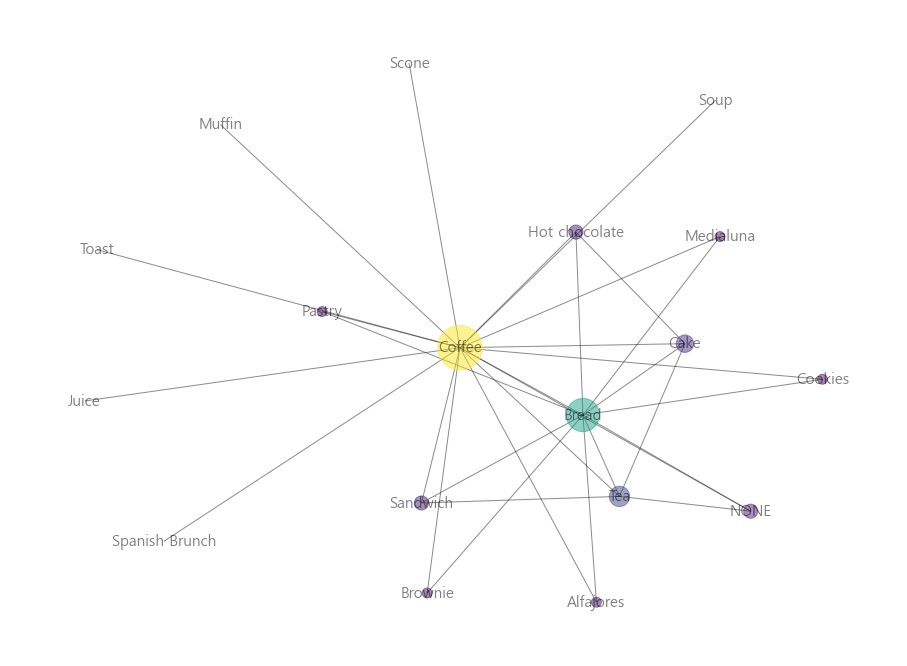

In [112]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(16,12)); plt.axis('off')

fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)